<h2>Logistic Regression</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

### Importing dataset

In [2]:
# importing data from dataset
train_dataset =  h5py.File('train_catvnoncat.h5','r')
test_dataset =  h5py.File('test_catvnoncat.h5','r')
list(test_dataset.keys())

['list_classes', 'test_set_x', 'test_set_y']

In [3]:
# splitting the dataset into train and test set
X_train_orig = train_dataset['train_set_x']
Y_train_orig = train_dataset['train_set_y']
X_test_orig = test_dataset['test_set_x']
Y_test_orig = test_dataset['test_set_y']

In [4]:
# converting to numpy array
X_train_orig = np.array(X_train_orig)
Y_train_orig = np.array(Y_train_orig)
X_test_orig = np.array(X_test_orig)
Y_test_orig = np.array(Y_test_orig)

In [5]:
# flattening the dataset
#X_train_flatten = X_train_orig.reshape(-1, X_train_orig.shape[0])
#X_test_flatten = X_test_orig.reshape(-1, X_test_orig.shape[0])

X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

In [6]:
# standarizing the datset
X_train_std = X_train_flatten/255.
X_test_std = X_test_flatten/255.

In [7]:
#Reshaping Y to remove rank 1 matrices
Y_train = Y_train_orig.reshape(1, Y_train_orig.shape[0])
Y_test = Y_test_orig.reshape(1, Y_test_orig.shape[0])

In [8]:
#Printing dataset sizes to make sure the dimensions are okay
print("Size of X_train_std = " + str(X_train_std.shape))
print("Size of Y_train = " + str(Y_train.shape))
print("Size of X_test_std = " + str(X_test_std.shape))
print("Size of Y_test = " + str(Y_test.shape))

Size of X_train_std = (12288, 209)
Size of Y_train = (1, 209)
Size of X_test_std = (12288, 50)
Size of Y_test = (1, 50)


### Sigmoid function

In [9]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

In [10]:
def sigmoid_check(c):
    x=np.random.randn(1, c)*0.01
    r = -c*0.05
    for i in range(0, c):
        r = r+0.1
        x[0, i] = r
    x=x.reshape(c,)
    sigmoid_x = sigmoid(x)
    sigmoid_x = sigmoid_x.reshape(c,)
    plt.plot(x, sigmoid_x)
    plt.xlabel('x')
    plt.ylabel('sigmoid(x)')
    plt.show()

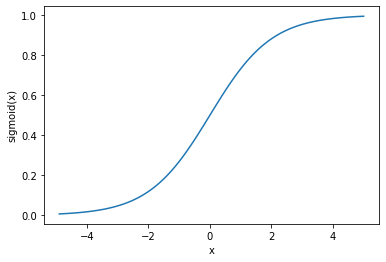

In [11]:
sigmoid_check(100)

### Initialize parameters

In [12]:
def initialize_parameters(dim):
    W = np.zeros((dim, 1))
    b = 0
    assert(W.shape == (dim, 1))
    parameters = {'W': W,
                 'b': b}
    return parameters

### Forward Propagation

In [13]:
def propagate_forward(parameters, X):
    W = parameters['W']
    b = parameters['b']
    
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    assert(Z.shape == (1, X.shape[1]))
    return A, Z

### Compute cost

In [14]:
def compute_cost(A, Y):
    m = Y.shape[1]
    cost = -1/m*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    return cost

### Backward propagation

In [15]:
def propagate_backward(A, X, Y):
    m = X.shape[1]
    dZ = A-Y
    dW = 1/m*np.dot(X, dZ.T)
    db = 1/m*np.sum(dZ, axis = 1, keepdims = True)
    
    grads = {'dW': dW,
            'db': db}
    return grads

### Gradient descent and parameter update

In [16]:
def gradient_descent(parameters, grads, learning_rate):
    W = parameters['W']
    b = parameters['b']
    dW = grads['dW']
    db = grads['db']
    
    W = W-learning_rate*dW
    b = b-learning_rate*db
    
    parameters = {'W': W,
                 'b': b}
    return parameters

## Prediction

In [17]:
def predict(parameters, X):    
    m = X.shape[1]
    W = parameters['W']
    b = parameters['b']
    Y_pred = np.zeros((1, m))
    A = sigmoid(np.dot(W.T, X) + b)
    for i in range(m):
        if A[0, i]>=0.5:
            Y_pred[0, i] = 1
        else:
            Y_pred[0, i] = 0
    return Y_pred

## Full model

In [18]:
def model(X_train, Y_train, X_test, Y_test, learning_rate, iterations, print_cost):
    costs = []
    num_iterations = []
    parameters = initialize_parameters(X_train.shape[0])
    for i in range(1, iterations):
        A, Z = propagate_forward(parameters, X_train)
        cost = compute_cost(A, Y_train)
        if print_cost == True:
            if i%100 == 0:
                print("cost after iteration "+str(i)+" = " + str(cost))
                costs.append(cost)
                num_iterations.append(i)
        grads = propagate_backward(A, X_train, Y_train)
        parameters = gradient_descent(parameters, grads, learning_rate)
    
    Y_pred_train = predict(parameters, X_train)
    Y_pred_test = predict(parameters, X_test)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))
    
    #Plot cost 
    plt.plot(num_iterations, costs)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    plt.show()
    
    return parameters, costs, num_iterations

## Testing the model

cost after iteration 100 = 0.6448978829531701
cost after iteration 200 = 0.4848936141484849
cost after iteration 300 = 0.37776149521638064
cost after iteration 400 = 0.3317754055523586
cost after iteration 500 = 0.3035286720260553
cost after iteration 600 = 0.28009427757967503
cost after iteration 700 = 0.2602258475628189
cost after iteration 800 = 0.24310018399838854
cost after iteration 900 = 0.22814432769465368
cost after iteration 1000 = 0.21494377069682485
cost after iteration 1100 = 0.2031892821910463
cost after iteration 1200 = 0.19264428020365887
cost after iteration 1300 = 0.18312389153132902
cost after iteration 1400 = 0.1744810138688702
cost after iteration 1500 = 0.16659675354042905
cost after iteration 1600 = 0.15937369509858546
cost after iteration 1700 = 0.15273105849939206
cost after iteration 1800 = 0.14660114629898885
cost after iteration 1900 = 0.14092669166965172
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


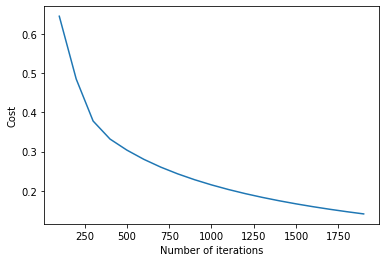

In [19]:
parameters, costs, num_iterations = model(X_train_std, Y_train, X_test_std, Y_test, learning_rate = 0.005, iterations = 2000, print_cost=True)

In [25]:
Y_pred_train = predict(parameters, X_train_std)
Y_pred_test = predict(parameters, X_test_std)
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %
